# Usage of the drawing code:

Please refer to the Markdown text preceding each code block to understand its functionality.

*Note: Some code is integrated into Python files; when running, place them in the same directory.*

* Preparation: Cell 1, 2, 5
* UMAP: Cell 3, 4
* Heatmap: Cell 6, 7, 8, 9
* Boxplot: Cell 10,11

**Cell 1:**

Preparation: Map the prediction files generated by the model to the tags in the fasta file and tag.txt file.

**After the run completes, execute Cell 5 to perform the clustering task, then proceed with the subsequent steps.**

*Considering that this plotting process may require multiple rounds of debugging, we recommend distinguishing between different experimental batches by modifying the modified_number parameter. Subsequent cells will uniformly adopt this parameter.*

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

#Variable Settings：Please modify this section of code according to your actual storage configuration.
species_name = 'osa' 
modified_number = 1
fa_file_path = f"../data/training_fa/mergedtag_{species_name}_1024_500.fa"

base_path = os.path.join('../data/',species_name)

prediction_path = os.path.join(base_path,'new_data_predictions.npy')

save_path = os.path.join('../',species_name,'modified_1_prediction_results')
if not os.path.exists(save_path):
    os.makedirs(save_path)
    print(f"{save_path} Created")
else:
    print(f"{save_path} Already Exists")

prediction = np.load(prediction_path)

print(prediction.shape)

tag_file = f'../data/training_fa/tag_{species_name}.txt'

with open(tag_file) as f:
    tag_list = f.readlines()

tag_dict = { item.strip():index for index, item in enumerate(tag_list) }
nfeature = len(tag_dict)
print(tag_dict)

../osa/modified_1_prediction_results Already Exists
(580251, 58)
{'osa_AGO': 0, 'osa_AP2': 1, 'osa_ARF': 2, 'osa_ASR': 3, 'osa_Biotin': 4, 'osa_C2H2': 5, 'osa_CENH3': 6, 'osa_CO-like': 7, 'osa_E2F_DP': 8, 'osa_ERF': 9, 'osa_G2-like': 10, 'osa_GRAS': 11, 'osa_GRF': 12, 'osa_GW6a': 13, 'osa_H2AZ': 14, 'osa_H2Bub1': 15, 'osa_H3': 16, 'osa_H3K14CR': 17, 'osa_H3K18AC': 18, 'osa_H3K23AC': 19, 'osa_H3K27AC': 20, 'osa_H3K27ME3': 21, 'osa_H3K36ME1': 22, 'osa_H3K36ME2': 23, 'osa_H3K36ME3': 24, 'osa_H3K4AC': 25, 'osa_H3K4ME1': 26, 'osa_H3K4ME2': 27, 'osa_H3K4ME3': 28, 'osa_H3K56AC': 29, 'osa_H3K9AC': 30, 'osa_H3K9ME1': 31, 'osa_H3K9ME2': 32, 'osa_H3K9ME3': 33, 'osa_H4AC': 34, 'osa_H4K12AC': 35, 'osa_H4K16AC': 36, 'osa_HD-ZIP': 37, 'osa_HHC4': 38, 'osa_HPY1': 39, 'osa_LAZY': 40, 'osa_LC2': 41, 'osa_MIKC_MADS': 42, 'osa_NAC': 43, 'osa_NF-YB': 44, 'osa_OsIDS1': 45, 'osa_OsSGL': 46, 'osa_OsSRT1': 47, 'osa_PIBP1': 48, 'osa_RNAPII': 49, 'osa_SBP': 50, 'osa_SDG711': 51, 'osa_TALE': 52, 'osa_TOC1': 53, '

**Cell 2:**

If you believe certain printed tags are not relevant to your research, you can delete them in this cell.

In [3]:
#Delete the tag column with the given name
tag_to_delete = ['osa_H3', 'osa_H2Bub1','osa_H4AC']

tag_to_delete_index = []
for tag in tag_to_delete:
    tag_to_delete_index.append(tag_dict[tag])

for index in tag_to_delete_index:
    prediction_modified_1 = np.delete(prediction,index,axis = 1)

prediction_modified_1_path = os.path.join(save_path,f'new_data_predictions_modified_{modified_number}.npy')
np.save(prediction_modified_1_path,prediction_modified_1)

**Cell 3:**

UMAP Plotting Code

 ../osa/modified_1_prediction_results/figure Created


/public/workspace/hanquan/liyilin/final_code&data/code/UMAP_draw.py:115: RuntimeWarning: divide by zero encountered in log
  beta= np.sum((np.log(dist[:,1:])-np.mean(np.log(dist[:,1:]),axis=1)[:,None])*(np.log(np.arange(1, k_num)) - np.mean(np.log(np.arange(1,k_num))))[None,:],axis=1)/np.sum((np.log(dist[:,1:])-np.mean(np.log(dist[:,1:]),axis=1)[:,None])**2,axis=1)
/public/workspace/hanquan/liyilin/final_code&data/code/UMAP_draw.py:115: RuntimeWarning: invalid value encountered in subtract
  beta= np.sum((np.log(dist[:,1:])-np.mean(np.log(dist[:,1:]),axis=1)[:,None])*(np.log(np.arange(1, k_num)) - np.mean(np.log(np.arange(1,k_num))))[None,:],axis=1)/np.sum((np.log(dist[:,1:])-np.mean(np.log(dist[:,1:]),axis=1)[:,None])**2,axis=1)
/public/workspace/hanquan/anaconda3/envs/Osei_lyl_draw/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


           x          y  cluster
0 -28.042014  -5.687482       27
1  20.895293 -11.675147       25
2  21.167970 -10.802496       25
3  21.187363 -10.796575       25
4 -26.769431  -5.323749       27


/public/workspace/hanquan/liyilin/final_code&data/code/UMAP_draw.py:237: UserWarning: The palette list has more values (31) than needed (30), which may not be intended.
  scatter = sns.scatterplot(


UMAP is finished!


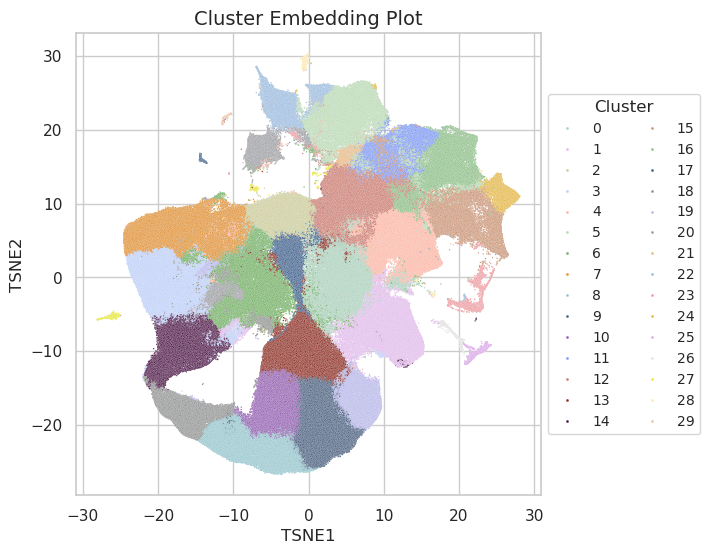

In [4]:
import UMAP_draw

figure_path = os.path.join(save_path,f'figure')
if not os.path.exists(figure_path):
    os.makedirs(figure_path)
    print(f" {figure_path} Created")
else:
    print(f" {figure_path} Already Exists")

UMAP_draw.main(save_path,modified_number)

print('UMAP is finished!')

**Cell 4:**
    
UMAP_draw File Plotting Section

*If you only wish to modify plot colors, shapes, etc., without repeating the slow and complex data dimensionality reduction and clustering process described earlier*

*Please modify this path according to the previously generated file path.*


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

# Loading index data
inds_path = "/public/workspace/hanquan/liyilin/merged_tag_five/osa_HFT/osa/modified_1_prediction_results/univar.subsample.beta.1000000.euclidean.inds_modified_1.npy"
inds = np.load(inds_path)

# Loading primary data
leiden_path = "/public/workspace/hanquan/liyilin/merged_tag_five/osa_HFT/osa/modified_1_prediction_results/new_data_predictions_modified_1.leiden30.npy"
tsne_result_path = "/public/workspace/hanquan/liyilin/merged_tag_five/osa_HFT/osa/modified_1_prediction_results/tsne_result_modified_1.npy"
clustername_path = "/public/workspace/hanquan/liyilin/merged_tag_five/osa_HFT/osa/modified_1_prediction_results/cluster_bed_modified_1/cluster_list_modified_1.txt"

c = np.load(leiden_path)
embedding = np.load(tsne_result_path)
print("Original cluster statistics:", Counter(c))

# 1. Read the cluster name mapping file
cluster_name_map = {}
with open(clustername_path, 'r') as f:
    for line in f:
        parts = line.strip().split(maxsplit=1)  # Split only at the first space.
        if len(parts) == 2:
            cluster_num = parts[0].replace("cluster", "")  # Remove possible cluster prefixes
            cluster_name = parts[1]
            cluster_name_map[int(cluster_num)] = cluster_name  # Use numbers as keys

# 2. Process data points and apply name mapping
cluster_embedding_plot = []
cluster_count = {}
max_num = 25000
custom_palette = ["#ABD1BC", "#E3BBED", "#CCCC99", 
                "#BED0F9", "#FCB6A5", "#BADAB5", "#72B063",
                "#E29135","#94C6CD","#4A5F7E",
                "#925EB0","#7E99F4","#CC7C71",
                "#8D2F25","#4E1947","#CB9475",
                "#8CBF87","#3E608D","#909291",
                "#B7B7EB","#9D9EA3","#EAB883",
                "#9BBBE0","#F09BA0","#E6B745",
                "#DCA7EB","#E3E3E1","#EAE935",
                "#FDEBAA", "#EDC3A5", "#DBE4FB"


]
for i, cluster_num in enumerate(c[inds]):
    # Application Name Mapping
    cluster_name = cluster_name_map.get(cluster_num, f"Unclassified_{cluster_num}")
    
    # Quantity Control
    if cluster_num in cluster_count:
        cluster_count[cluster_num] += 1
    else:
        cluster_count[cluster_num] = 1
    
    if cluster_count[cluster_num] > max_num:
        continue
        
    cluster_embedding_plot.append({
        'x': embedding[i, 0],
        'y': embedding[i, 1],
        'cluster': cluster_name,
        'cluster_num': cluster_num  # Retain original numbers for sorting purposes.
    })

# 3. Create a DataFrame and sort it
cluster_plot_data = pd.DataFrame(cluster_embedding_plot)
cluster_plot_data = cluster_plot_data.sort_values(['cluster', 'cluster_num'])

# 4. Visualization Settings (Modified Section)
sns.set_theme(style="whitegrid")

# Adjust graphic dimensions and legend parameters
plt.figure(figsize=(10, 8))  # Increase graphic size

# 5. Create a drawing (add edge margins)
plt.subplots_adjust(right=0.7)  # Legend space reserved

scatter = sns.scatterplot(
    data=cluster_plot_data,
    x='x', 
    y='y', 
    hue='cluster',
    palette=custom_palette,
    alpha=0.8,
    s=3,  
    hue_order=sorted(cluster_plot_data['cluster'].unique())
)

# Set axes to the same scale
scatter.set_aspect('equal')  

# 6. Optimize title and legend settings
scatter.set_title('Cluster Embedding Plot', fontsize=16, pad=20)
scatter.set_xlabel('TSNE1', fontsize=14)
scatter.set_ylabel('TSNE2', fontsize=14)

# Calculate the appropriate legend position and number of columns
n_clusters = len(cluster_plot_data['cluster'].unique())
legend_cols = 2 if n_clusters > 15 else 1  # Automatically adjust the number of columns based on the number of clusters

legend = plt.legend(
    title="Cluster",
    title_fontsize=12,
    loc="upper left",
    fontsize=10,
    bbox_to_anchor=(1.05, 1), 
    markerscale=6,  
    ncol=legend_cols,
    frameon=False,
    framealpha=0.9,
    borderpad=1, 
    labelspacing=1.2 
)
figure_path = "/public/workspace/hanquan/liyilin/merged_tag_five/osa_HFT/figure/osa_cluster_named.png"
# 7. Save the results (adjust the bbox_inches parameter)
plt.savefig(figure_path, dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.close()

原始cluster统计: Counter({0: 47857, 1: 47758, 2: 37459, 3: 33536, 4: 31629, 5: 30910, 6: 29986, 7: 29232, 8: 28760, 9: 27864, 10: 27507, 11: 27029, 12: 23542, 13: 21900, 14: 21533, 15: 18259, 16: 18194, 17: 17341, 18: 15900, 19: 11737, 20: 9317, 21: 8336, 22: 5159, 23: 2482, 24: 2165, 25: 1855, 26: 1359, 27: 958, 28: 687})


/tmp/ipykernel_12216/4209791878.py:81: UserWarning: The palette list has more values (31) than needed (29), which may not be intended.
  scatter = sns.scatterplot(


**Cell 5:**
    
Clustering Code


In [3]:
import cluster_make
cluster_make.main(save_path,modified_number,fa_file_path)

580251
Cluster 0 saved to ../osa/modified_1_prediction_results/cluster_bed_modified_1/cluster0.bed
Cluster 1 saved to ../osa/modified_1_prediction_results/cluster_bed_modified_1/cluster1.bed
Cluster 2 saved to ../osa/modified_1_prediction_results/cluster_bed_modified_1/cluster2.bed
Cluster 3 saved to ../osa/modified_1_prediction_results/cluster_bed_modified_1/cluster3.bed
Cluster 4 saved to ../osa/modified_1_prediction_results/cluster_bed_modified_1/cluster4.bed
Cluster 5 saved to ../osa/modified_1_prediction_results/cluster_bed_modified_1/cluster5.bed
Cluster 6 saved to ../osa/modified_1_prediction_results/cluster_bed_modified_1/cluster6.bed
Cluster 7 saved to ../osa/modified_1_prediction_results/cluster_bed_modified_1/cluster7.bed
Cluster 8 saved to ../osa/modified_1_prediction_results/cluster_bed_modified_1/cluster8.bed
Cluster 9 saved to ../osa/modified_1_prediction_results/cluster_bed_modified_1/cluster9.bed
Cluster 10 saved to ../osa/modified_1_prediction_results/cluster_bed_modi

**Cell 6:**
    
Cluster Enrichment Computation Code

*Please modify the absolute path of the marker in this shell script according to your specific situation.*

In [1]:
!./calculate_enrichment.sh histone 1 osa osa_H3,osa_H2Bub1,osa_H4AC
!./calculate_enrichment.sh TFBS 1 osa

Skipping file: osa_H2Bub1.bed
Skipping file: osa_H3.bed
Skipping file: osa_H4AC.bed
Processing cluster: cluster0.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Skipping file: osa_H2Bub1.bed
Skipping file: osa_H3.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not f

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Processing cluster: cluster12.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Skipping file: osa_H2Bub1.bed
Skipping file: osa_H3.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_en

./calculate_enrichment.sh: line 85: bedtools: command not found
Skipping file: osa_H4AC.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Processing cluster: cluster15.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Skipping file: osa_H2Bub1.bed
Skipping file: osa_H3.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: comm

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Skipping file: osa_H4AC.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Processing cluster: cluster18.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Skipping file: osa_H2Bub1.bed
Skipping file: osa_H3.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: comm

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Skipping file: osa_H4AC.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Processing cluster: cluster20.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Skipping file: osa_H2Bub1.bed
Skipping file: osa_H3.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: comm

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Skipping file: osa_H4AC.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Processing cluster: cluster23.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Skipping file: osa_H2Bub1.bed
Skipping file: osa_H3.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: comm

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Skipping file: osa_H4AC.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Processing cluster: cluster26.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Skipping file: osa_H2Bub1.bed
Skipping file: osa_H3.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: comm

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Skipping file: osa_H4AC.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Processing cluster: cluster29.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Skipping file: osa_H2Bub1.bed
Skipping file: osa_H3.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: comm

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Skipping file: osa_H4AC.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Processing cluster: cluster4.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Skipping file: osa_H2Bub1.bed
Skipping file: osa_H3.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: comma

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Skipping file: osa_H4AC.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Processing cluster: cluster7.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Skipping file: osa_H2Bub1.bed
Skipping file: osa_H3.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: comma

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Skipping file: osa_H4AC.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Processing cluster: cluster_list_modified_1.txt
Error: total length of cluster_list_modified_1.txt is non-positive.
Processing cluster: cluster0.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command n

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Processing cluster: cluster11.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calc

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Processing cluster: cluster13.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calc

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedt

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedt

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedt

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedt

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedt

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedt

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedt

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedt

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Processing cluster: cluster29.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calc

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Processing cluster: cluster3.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calcu

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Processing cluster: cluster5.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calcu

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Processing cluster: cluster7.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calcu

./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
Processing cluster: cluster9.bed
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calculate_enrichment.sh: line 85: bedtools: command not found
./calcu

**Cell 7:**
    
Heatmap Sketch Drawing

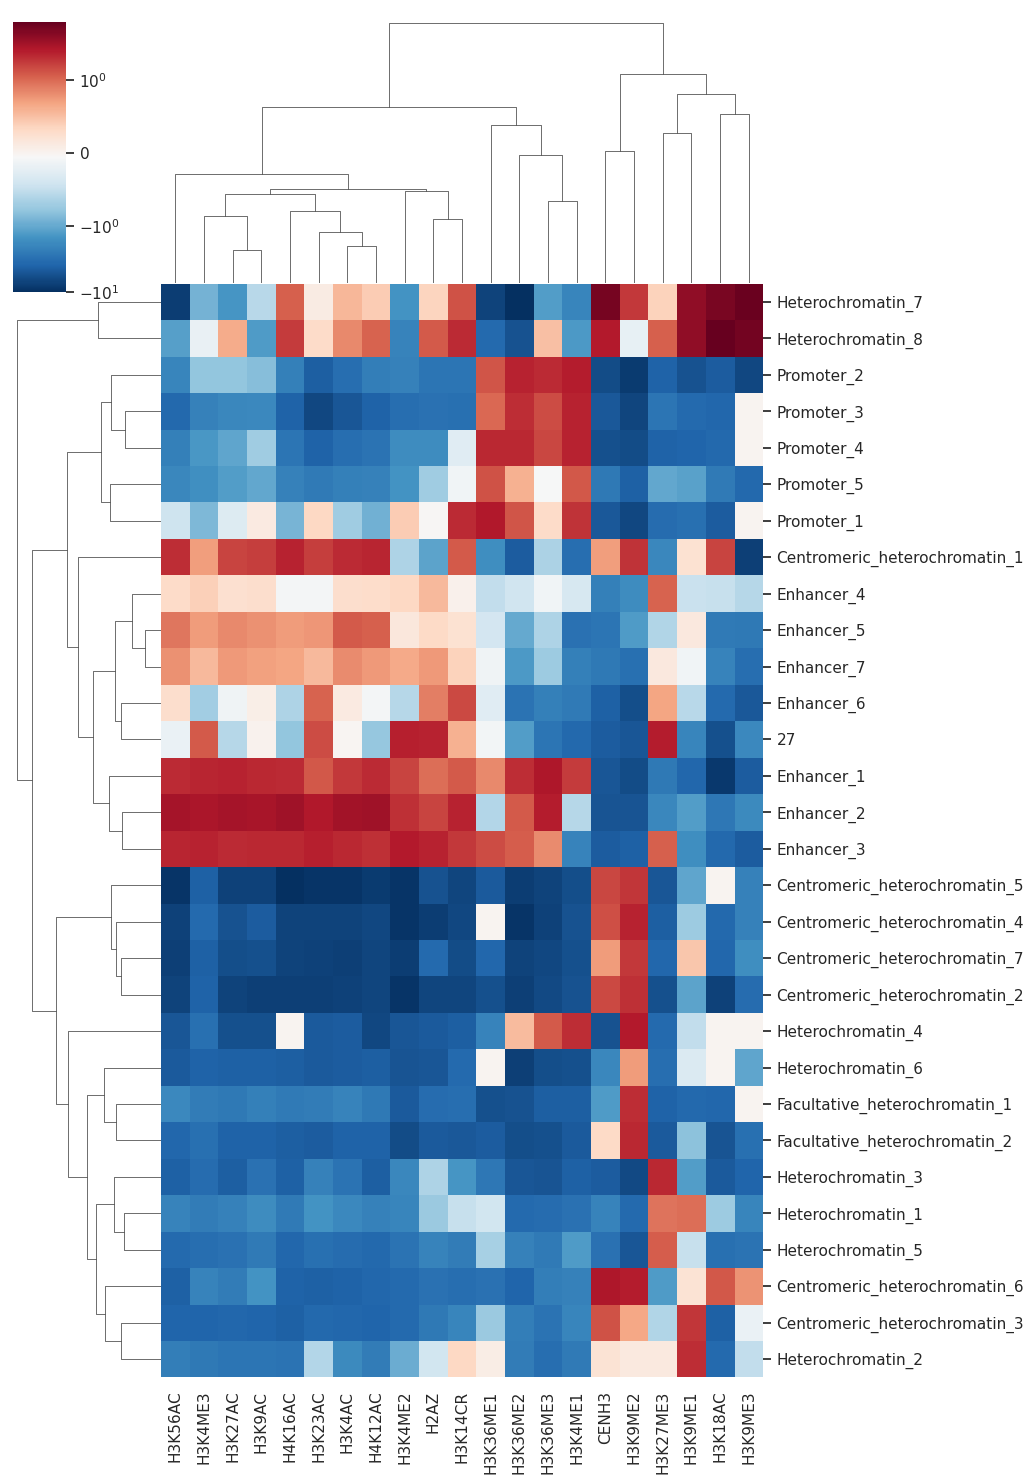

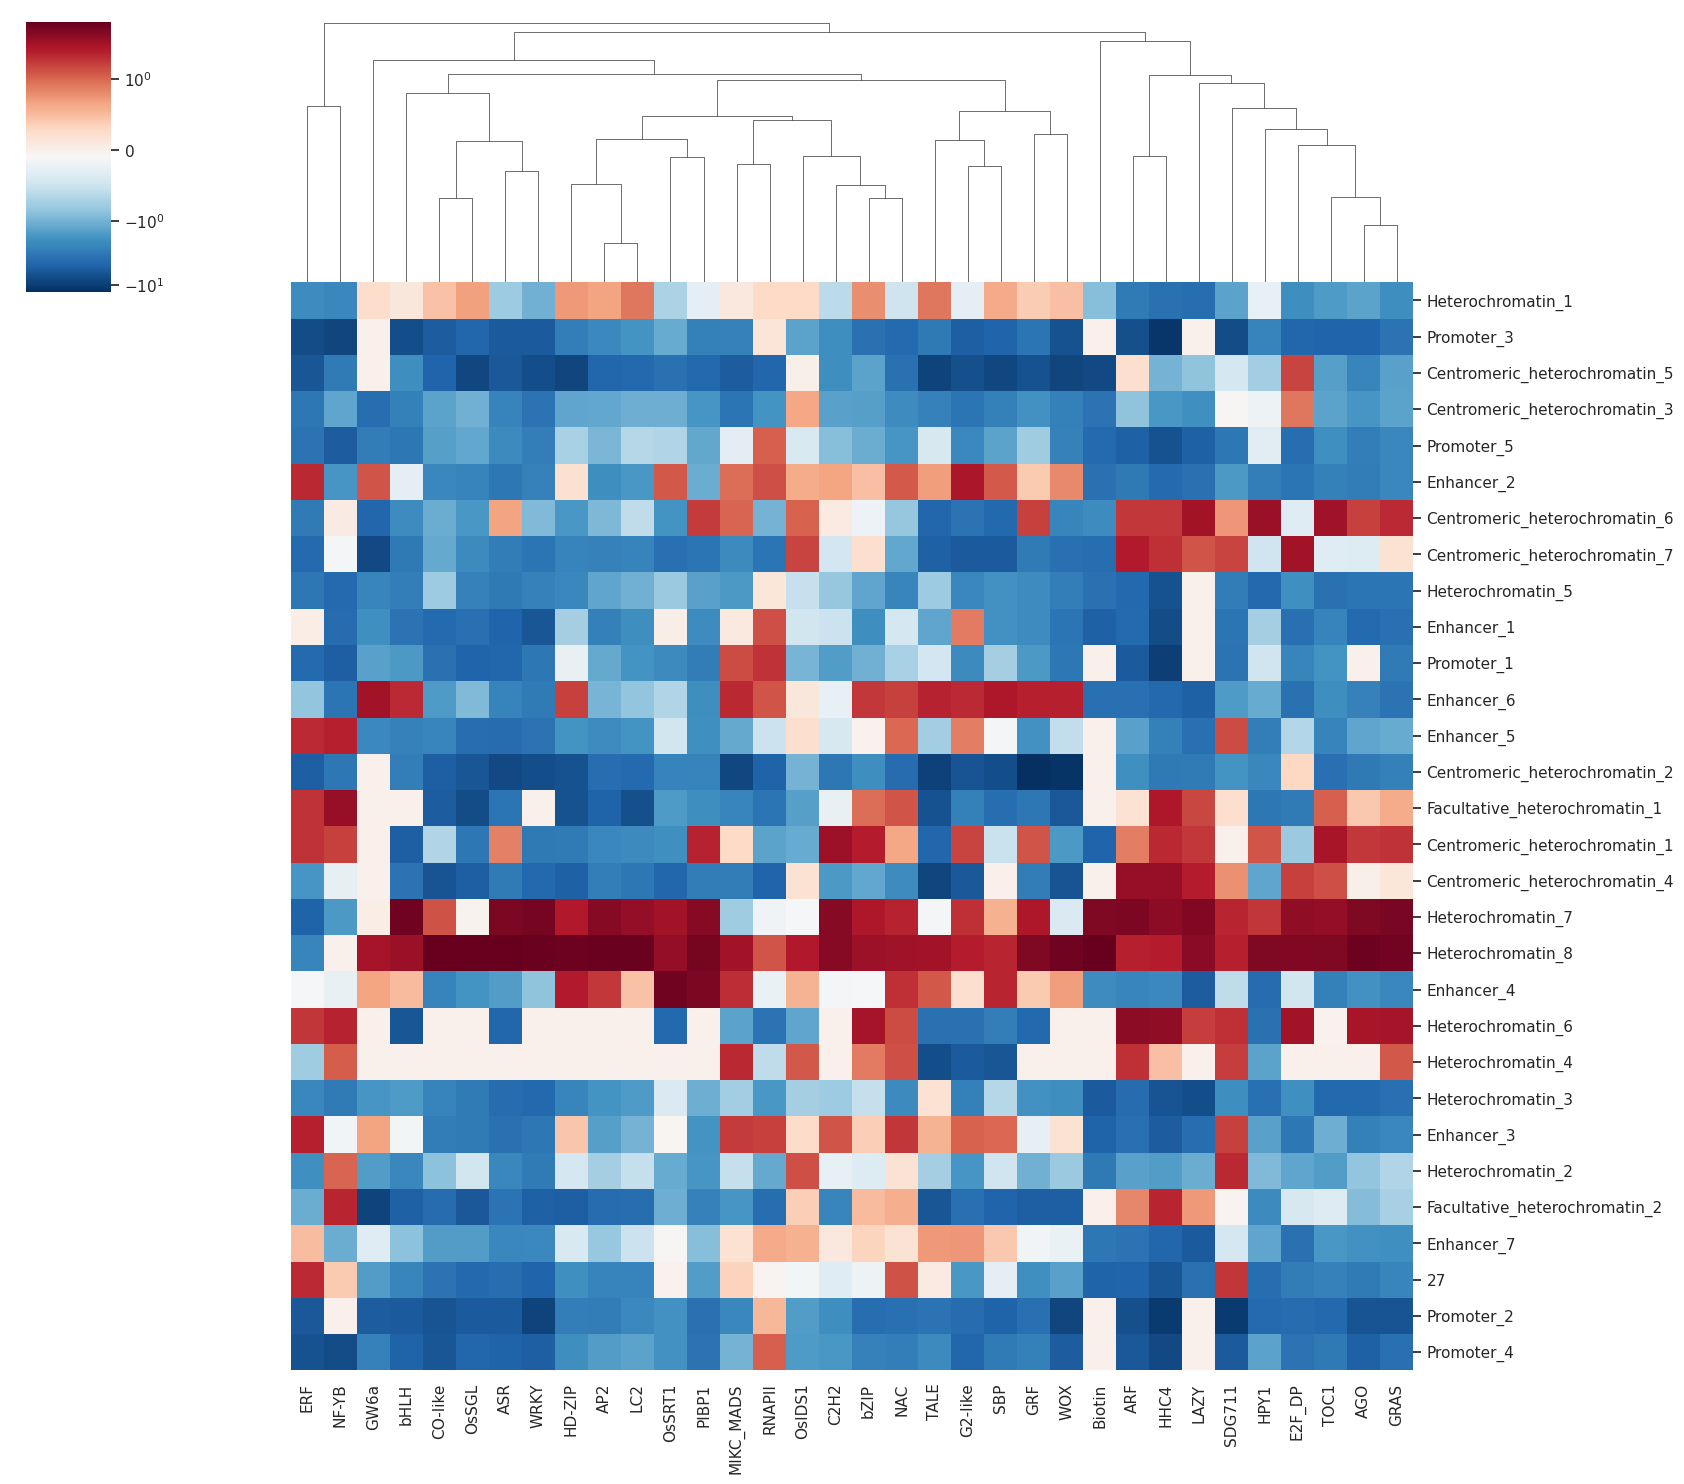

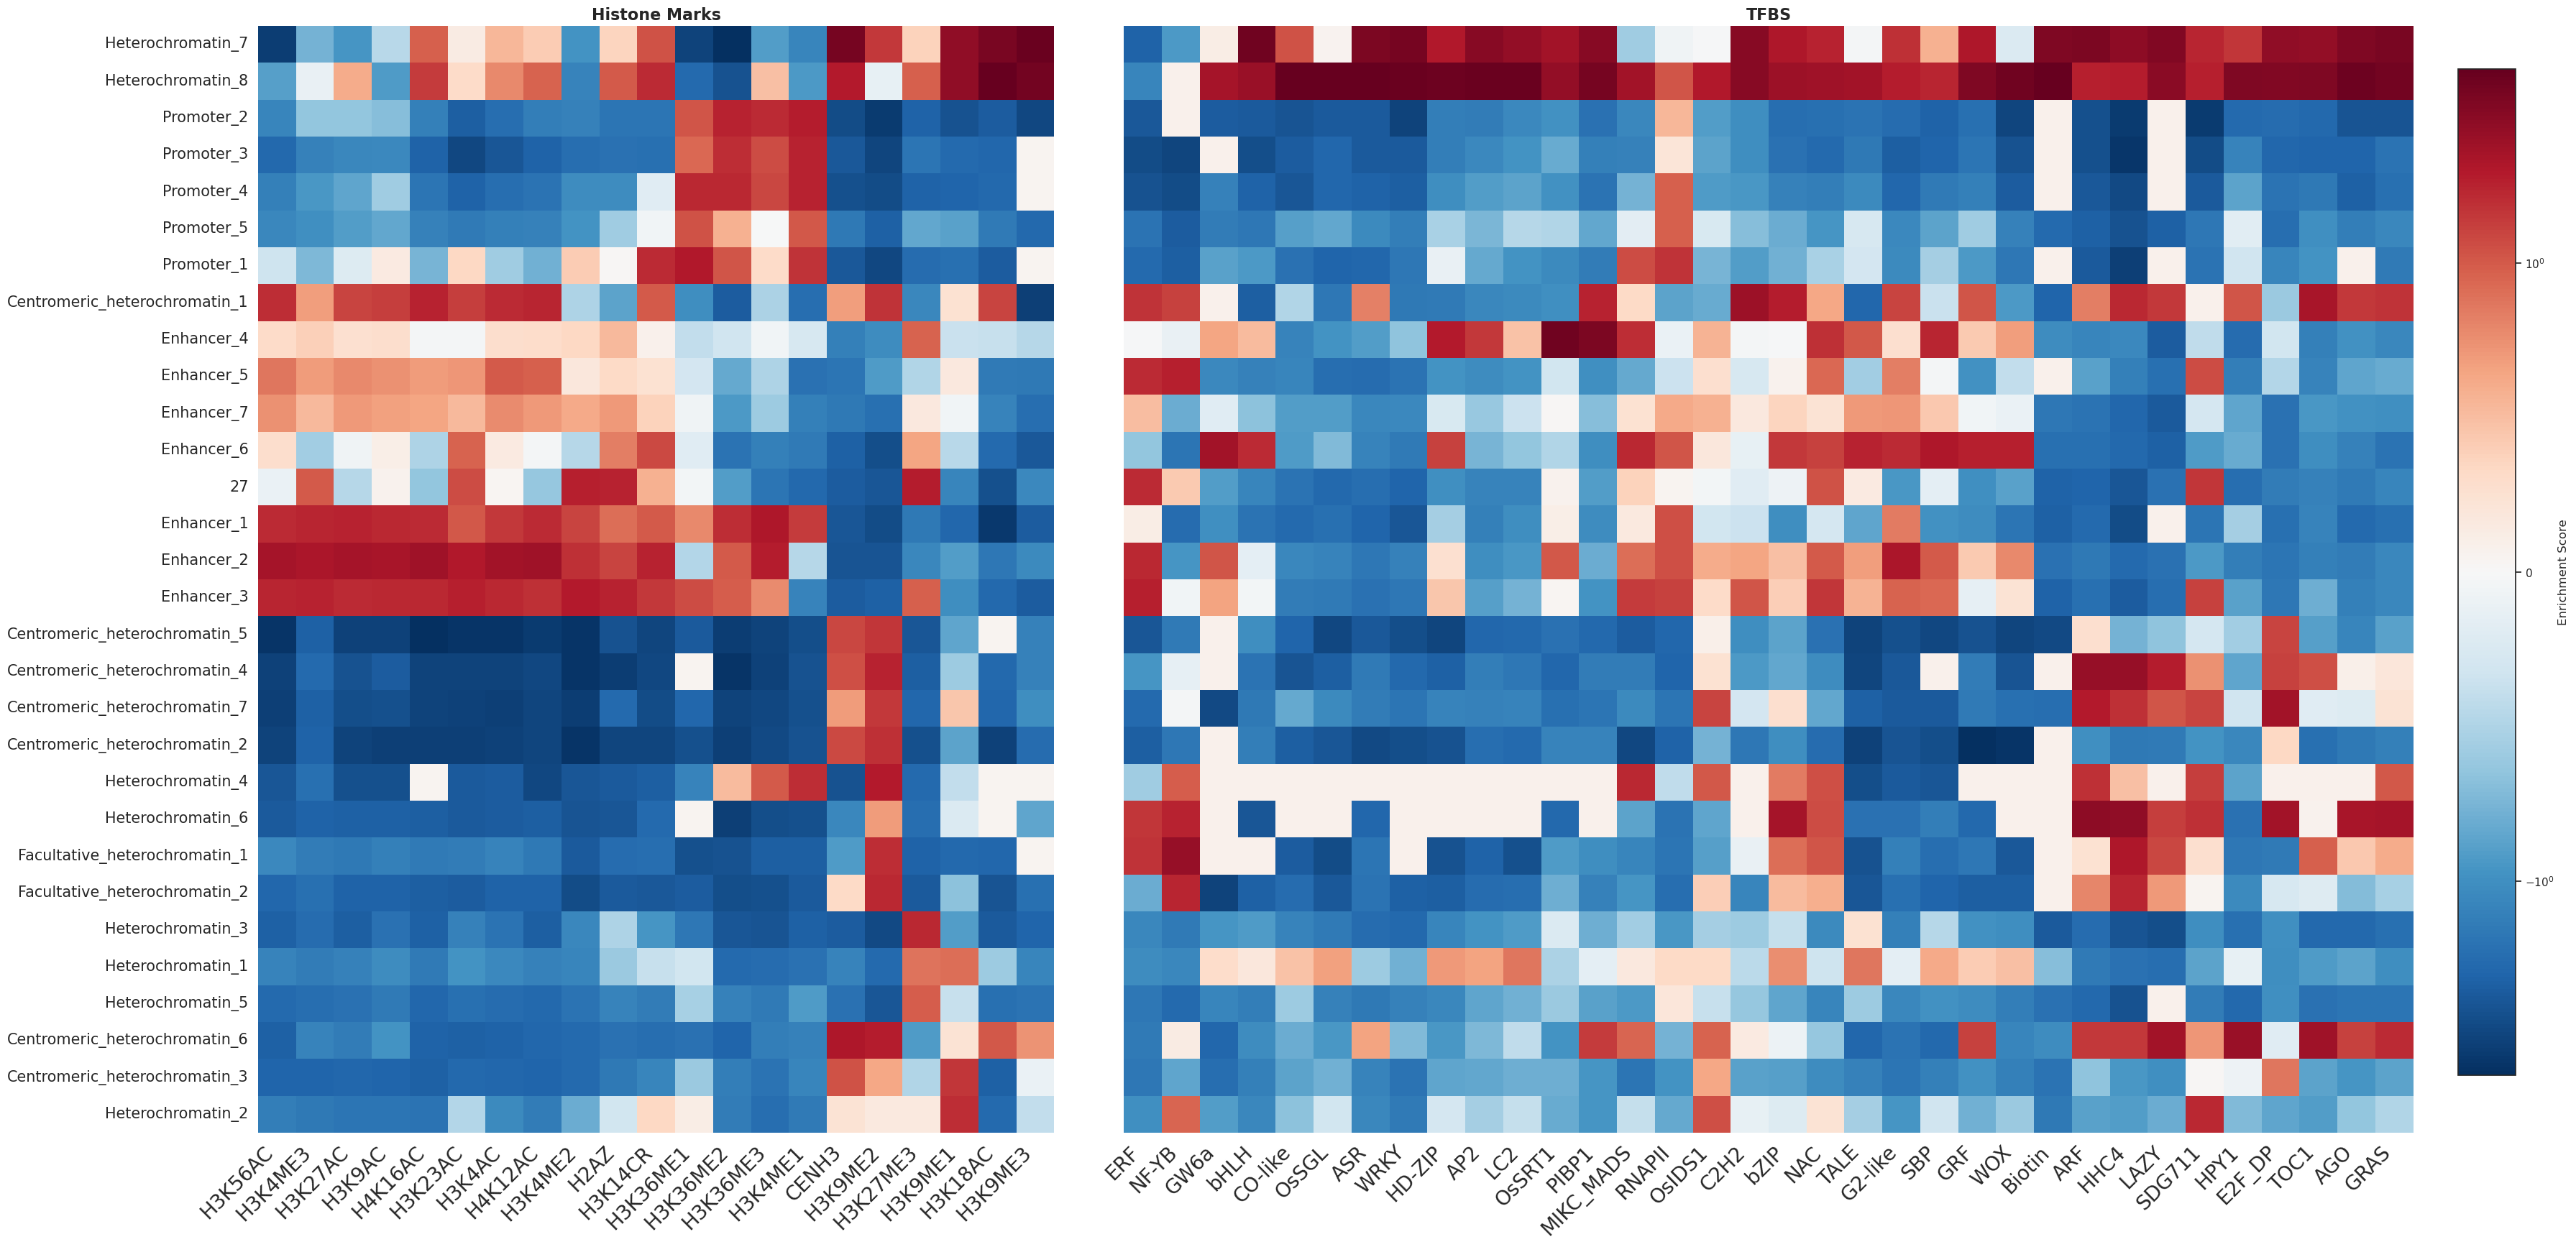

Index(['Heterochromatin_7', 'Heterochromatin_8', 'Promoter_2', 'Promoter_3',
       'Promoter_4', 'Promoter_5', 'Promoter_1',
       'Centromeric_heterochromatin_1', 'Enhancer_4', 'Enhancer_5',
       'Enhancer_7', 'Enhancer_6', '27', 'Enhancer_1', 'Enhancer_2',
       'Enhancer_3', 'Centromeric_heterochromatin_5',
       'Centromeric_heterochromatin_4', 'Centromeric_heterochromatin_7',
       'Centromeric_heterochromatin_2', 'Heterochromatin_4',
       'Heterochromatin_6', 'Facultative_heterochromatin_1',
       'Facultative_heterochromatin_2', 'Heterochromatin_3',
       'Heterochromatin_1', 'Heterochromatin_5',
       'Centromeric_heterochromatin_6', 'Centromeric_heterochromatin_3',
       'Heterochromatin_2'],
      dtype='object')
The heatmap is saved in ../osa/modified_1_prediction_results/figure/default_heatmap_osa_modified_1HFT.png!
['CENH3', 'H2AZ', 'H3K14CR', 'H3K18AC', 'H3K23AC', 'H3K27AC', 'H3K27ME3', 'H3K36ME1', 'H3K36ME2', 'H3K36ME3', 'H3K4AC', 'H3K4ME1', 'H3K4ME2', 'H3K4

In [21]:
import TFBS_Histone
histone_reorder , tfbs_reorder , histone_tag , tfbs_tag = TFBS_Histone.default(species_name,save_path,1,)
print(histone_tag)
print(tfbs_tag)

**Cell 8:**
    
Here, the indexing order of the heatmap and the tag sequence are arranged to ensure the heatmap appears neat, aesthetically pleasing, and orderly.

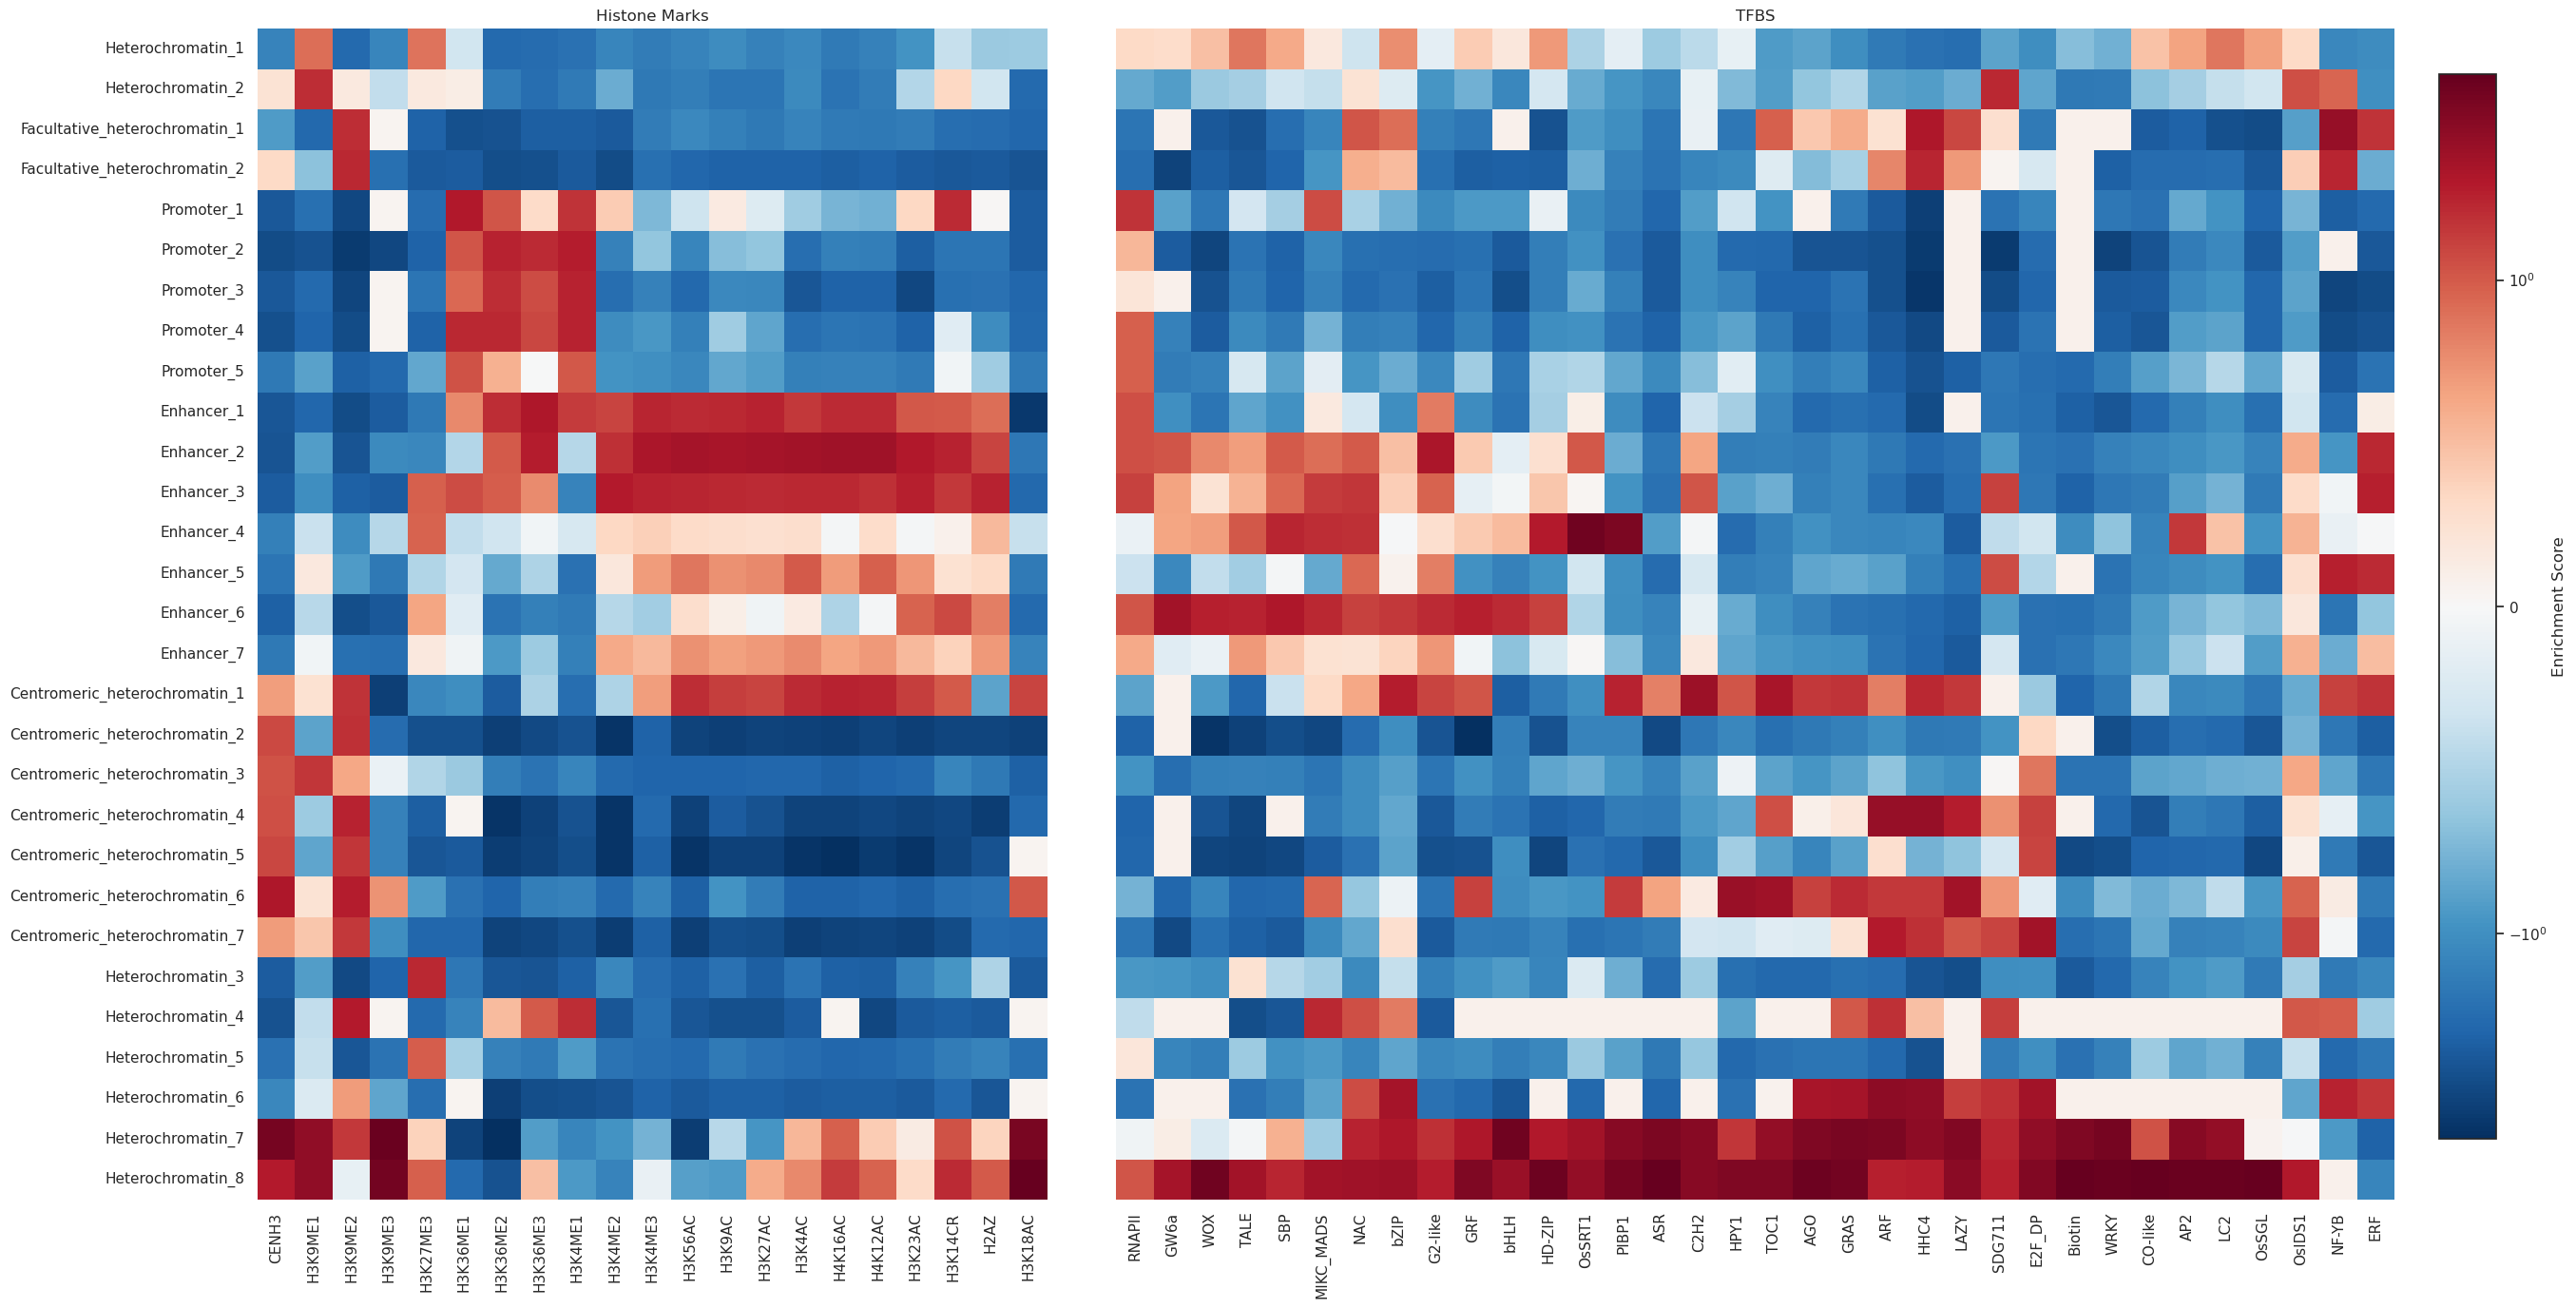

The heatmap is saved in ../osa/modified_1_prediction_results/figure/1_heatmap_osa_modified_1HFT.png!


In [22]:
import TFBS_Histone

# Adjusted Index Order
cluster_order = [ 'Heterochromatin_1', 
    'Heterochromatin_2',
    'Facultative_heterochromatin_1', 
    'Facultative_heterochromatin_2', 
    'Promoter_1',
    'Promoter_2',
    'Promoter_3',
    'Promoter_4',
    'Promoter_5',
    'Enhancer_1',
    'Enhancer_2', 
    'Enhancer_3',
    'Enhancer_4',
    'Enhancer_5',
    'Enhancer_6',
    'Enhancer_7', 
    'Centromeric_heterochromatin_1',
    'Centromeric_heterochromatin_2',
    'Centromeric_heterochromatin_3',
    'Centromeric_heterochromatin_4', 
    'Centromeric_heterochromatin_5',
    'Centromeric_heterochromatin_6', 
    'Centromeric_heterochromatin_7',
    'Heterochromatin_3',     
    'Heterochromatin_4', 
    'Heterochromatin_5',
    'Heterochromatin_6',  
    'Heterochromatin_7', 
    'Heterochromatin_8']
histone_cols = ['CENH3', 'H3K9ME1', 'H3K9ME2', 'H3K9ME3',  'H3K27ME3', 'H3K36ME1', 
'H3K36ME2', 'H3K36ME3',  'H3K4ME1', 
'H3K4ME2', 'H3K4ME3', 'H3K56AC','H3K9AC', 
 'H3K27AC','H3K4AC', 'H4K16AC', 'H4K12AC','H3K23AC',
'H3K14CR','H2AZ','H3K18AC' , ]

tfbs_cols = ['RNAPII','GW6a',
                
'WOX', 'TALE','SBP','MIKC_MADS','NAC','bZIP', 'G2-like',  'GRF','bHLH','HD-ZIP',    
'OsSRT1', 'PIBP1',  'ASR','C2H2','HPY1','TOC1', 'AGO',  
'GRAS', 'ARF',
'HHC4',  'LAZY','SDG711','E2F_DP','Biotin','WRKY','CO-like','AP2',  'LC2', 'OsSGL',  'OsIDS1',
'NF-YB', 
'ERF']


histone_reorder , tfbs_reorder = TFBS_Histone.reorder(histone_reorder,tfbs_reorder,cluster_order,histone_cols,tfbs_cols)
TFBS_Histone.draw(species_name,histone_reorder,tfbs_reorder,save_path,modified_number,1,30,16)



**Cell 9:**
    
Based on the category characteristics reflected in the heatmap, modify the corresponding cluster names.

*After modification, rerun Cell 7 and Cell 8.*

In [20]:
import cluster_rename
renamed_cluster={
    '0':'Heterochromatin_1', 
    '24':'Heterochromatin_2',
    '14':'Facultative_heterochromatin_1', 
    '25':'Facultative_heterochromatin_2', 
    '10':'Promoter_1',
    '28':'Promoter_2',
    '1':'Promoter_3',
    '29':'Promoter_4',
    '4':'Promoter_5',
    '9':'Enhancer_1',
    '5':'Enhancer_2', 
    '23':'Enhancer_3',
    '19':'Enhancer_4',
    '12':'Enhancer_5',
    '11':'Enhancer_6',
    '26':'Enhancer_7', 
    '15':'Centromeric_heterochromatin_1',
    '13':'Centromeric_heterochromatin_2',
    '3':'Centromeric_heterochromatin_3',
    '16':'Centromeric_heterochromatin_4', 
    '2':'Centromeric_heterochromatin_5',
    '6':'Centromeric_heterochromatin_6', 
    '7':'Centromeric_heterochromatin_7',
    '22':'Heterochromatin_3',     
    '21':'Heterochromatin_4', 
    '8':'Heterochromatin_5',
    '20':'Heterochromatin_6',  
    '17':'Heterochromatin_7', 
    '18':'Heterochromatin_8'
}

cluster_rename.rename('../osa/modified_1_prediction_results/cluster_bed_modified_1/cluster_list_modified_1.txt',renamed_cluster
)

Backup created: ../osa/modified_1_prediction_results/cluster_bed_modified_1/cluster_list_modified_1.txt.bak
Successfully updated: ../osa/modified_1_prediction_results/cluster_bed_modified_1/cluster_list_modified_1.txt
Processing completed successfully!


**Cell 10:**
    
Prepare work for Cell 11

In [26]:
import numpy as np
import pandas as pd

# Read data
histone_enrich = pd.read_csv('../osa/modified_1_prediction_results/histone_modified_1_enrichment.tsv',
                             sep='\t', header=None)
tfbs_enrich = pd.read_csv('../osa/modified_1_prediction_results/TFBS_modified_1_enrichment.tsv'
                          , sep='\t', header=None)

# Read cluster names
cluster_names = [rec.strip().split(' ')[-1] for rec in open('../osa/modified_1_prediction_results/cluster_bed_modified_1/cluster_list_modified_1.txt')]
element_positions = {}
for index, element in enumerate(cluster_names):
    key = element.split('_')[0] if '_' in element else element
    if key not in element_positions: 
        element_positions[key] = []
    element_positions[key].append(index)

# Define conversion function: AC → ac, ME → me (other parts remain uppercase)
def convert_histone_name(name):
    return name.replace('AC', 'ac').replace('ME', 'me')

# Set the index for histone_enrich
histone_row_names = [rec.strip().replace('osa_', '', 1) for rec in 
                     open('../osa/modified_1_prediction_results/histone_modified_1_list.txt').readlines()]
histone_row_names = [convert_histone_name(name) for name in histone_row_names]
histone_enrich.index = histone_row_names
print("Shape of histone_enric:", histone_enrich.shape)



# Set up the index for tfbs_enrich
tfbs_row_names = [rec.strip().replace('osa_', '', 1) for rec in 
                  open('../osa/modified_1_prediction_results/TFBS_modified_1_list.txt').readlines()]
tfbs_enrich.index = tfbs_row_names

# Set up the index for tfbs_enrich
histone_cols_to_keep = [
    'CENH3', 'H3K9me1', 'H3K9me2', 'H3K9me3', 'H3K27me3', 'H3K36me1', 
    'H3K36me2', 'H3K36me3', 'H3K4me1', 'H3K4me2', 'H3K4me3', 'H3K56ac',
    'H3K9ac', 'H3K27ac', 'H3K4ac', 'H4K16ac', 'H4K12ac', 'H3K23ac',
    'H3K14CR', 'H2AZ', 'H3K18ac'
]

tfbs_cols_to_keep = [
    'RNAPII', 'GW6a', 'WOX', 'TALE', 'SBP', 'MIKC_MADS', 'NAC', 'bZIP', 
    'G2-like', 'GRF', 'bHLH', 'HD-ZIP', 'OsSRT1', 'PIBP1', 'ASR', 'C2H2',
    'HPY1', 'TOC1', 'AGO', 'GRAS', 'ARF', 'HHC4', 'LAZY', 'SDG711', 
    'E2F_DP', 'Biotin', 'WRKY', 'CO-like', 'AP2', 'LC2', 'OsSGL', 'OsIDS1',
    'NF-YB', 'ERF'
]

# Retain only the specified columns and arrange them in the specified order.
histone_enrich = histone_enrich.reindex(index=histone_cols_to_keep)
print("Shape of histone_enrich after reindex:", histone_enrich.shape)

tfbs_enrich = tfbs_enrich.reindex(index=tfbs_cols_to_keep)
print("Shape of tfbs_enrich after reindex:", tfbs_enrich.shape)
# Handle infinity and NaN, and transpose
histone_enrich_log = histone_enrich.replace(np.inf, 1e7).fillna(1e-7).T
histone_enrich_log.index = cluster_names
print("Shape of histone_enrich_log:", histone_enrich_log.shape)
tfbs_enrich_log = tfbs_enrich.replace(np.inf, 1e7).fillna(1e-7).T
tfbs_enrich_log.index = cluster_names

# Output Check
print("Histone columns after reordering:", histone_enrich.columns.tolist())
print("TFBS columns after reordering:", tfbs_enrich.columns.tolist())

Shape of histone_enric: (21, 30)
Shape of histone_enrich after reindex: (21, 30)
Shape of tfbs_enrich after reindex: (34, 30)
Shape of histone_enrich_log: (30, 21)
Histone columns after reordering: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
TFBS columns after reordering: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


**Cell 11:**
    
Code for Plotting Box Plots in Cluster Quantitative Analysis

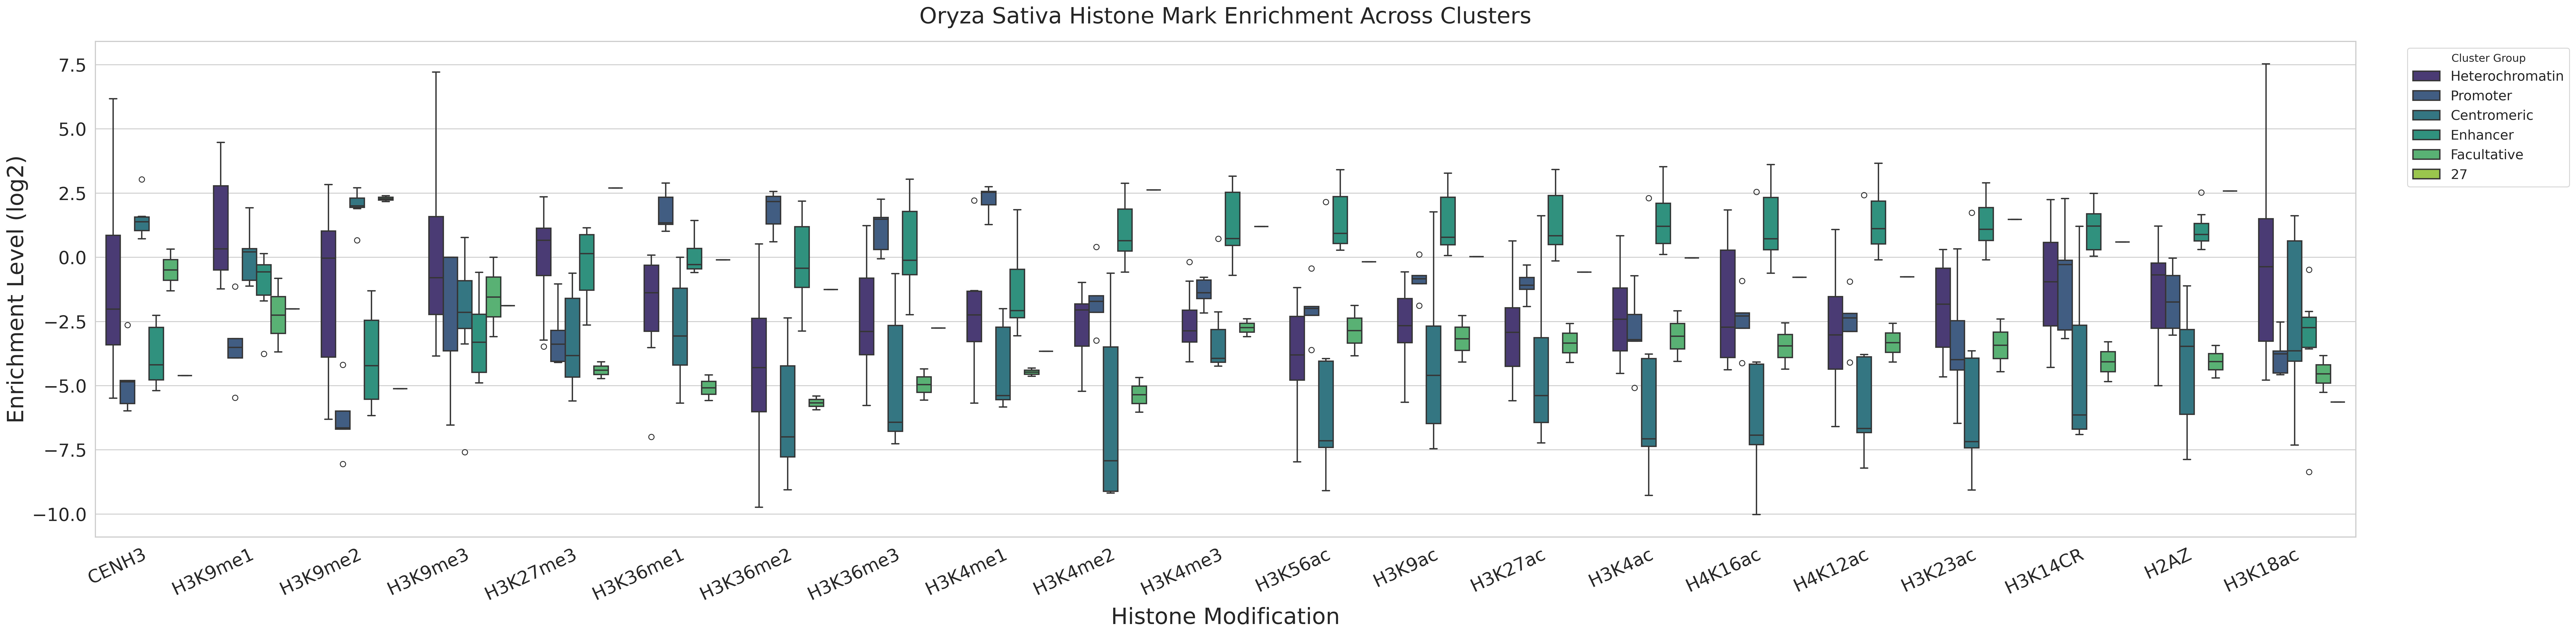

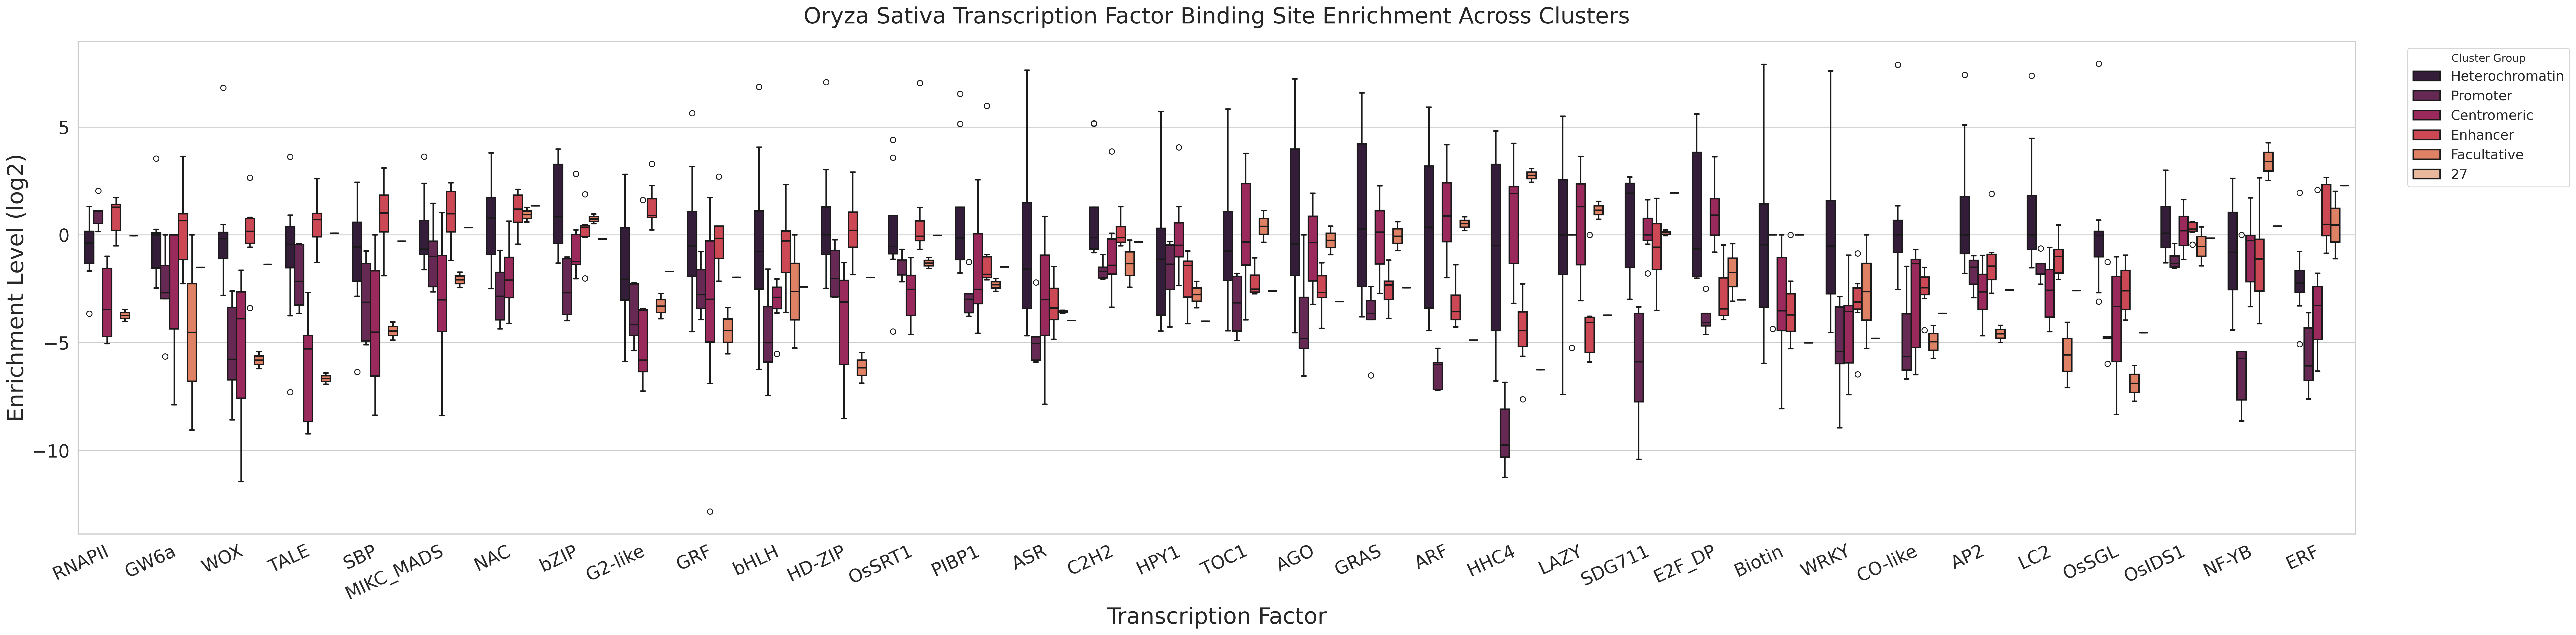

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare drawing data functions
def prepare_plot_data(enrich_data, element_positions):
    plot_data = []
    for key, indices in element_positions.items():
        key_data = enrich_data.iloc[indices]
        for feature in key_data.columns:
            for _, row in key_data.iterrows():
                plot_data.append({
                    'Element': key,
                    'Enrichment': row[feature],
                    'Feature': feature
                })
    return pd.DataFrame(plot_data)

# Prepare data
histone_plot_df = prepare_plot_data(histone_enrich_log, element_positions)
tfbs_plot_df = prepare_plot_data(tfbs_enrich_log, element_positions)

# Set global styles
sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 300 

# Plotting a Histone Box Plot (Standalone Graph)
plt.figure(figsize=(40, 10)) 
sns.boxplot(data=histone_plot_df, 
           x='Feature', y='Enrichment', hue='Element',
           palette="viridis", linewidth=1.5)
plt.title('Oryza Sativa Histone Mark Enrichment Across Clusters', fontsize=25, pad=20)
plt.xticks(rotation=25, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Histone Modification', fontsize=25)
plt.ylabel('Enrichment Level (log2)', fontsize=25)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', 
           title='Cluster Group', fontsize=15)
plt.tight_layout()
plt.savefig('../osa/osa_histone_mark_enrichment.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot TFBS Box-and-Whisker Plots (Individual Graphs)
plt.figure(figsize=(40, 10)) 
sns.boxplot(data=tfbs_plot_df, 
           x='Feature', y='Enrichment', hue='Element',
           palette="rocket", linewidth=1.5)
plt.title('Oryza Sativa Transcription Factor Binding Site Enrichment Across Clusters', 
          fontsize=25, pad=20)
plt.xticks(rotation=25, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Transcription Factor', fontsize=25)
plt.ylabel('Enrichment Level (log2)', fontsize=25)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', 
           title='Cluster Group', fontsize=15)
plt.tight_layout()
plt.savefig('../osa/osa_TF_mark_enrichment.png', dpi=300, bbox_inches='tight')
plt.show()